![Image](https://www.rd.com/wp-content/uploads/2017/10/Upside-Down-Houses-That-Will-Make-You-Look-Twice-courtesy-@nightrav3n-FT.jpg)

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as pl
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from plotly.graph_objs import *
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import cross_val_score
import math
import xgboost
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import pearsonr
from sklearn.svm import SVR
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from IPython.display import Image
from IPython.core.display import HTML 
import warnings; warnings.simplefilter('ignore')

In [54]:
data = pd.read_csv('file:///home/lagasz/kc_house_data.csv')

In [55]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [56]:
data = data.drop(['id', 'date'], axis = 1)

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(14)
memory usage: 3.1 MB


In [58]:
data.isnull().any()

price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [59]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm').set_properties(**{'font-size': '10pt'})

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1,0.30835,0.525138,0.702035,0.0896609,0.256794,0.266369,0.397293,0.0363618,0.667434,0.605567,0.323816,0.0540115,0.126434,-0.0532029,0.307003,0.0216262,0.585379,0.0824472
bedrooms,0.30835,1,0.515884,0.576671,0.0317032,0.175429,-0.00658248,0.0795319,0.0284721,0.356967,0.4776,0.303093,0.154178,0.0188408,-0.152668,-0.00893101,0.129473,0.391638,0.0292442
bathrooms,0.525138,0.515884,1,0.754665,0.0877397,0.500653,0.0637436,0.187737,-0.124982,0.664983,0.685342,0.28377,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.0871754
sqft_living,0.702035,0.576671,0.754665,1,0.172826,0.353949,0.103818,0.284611,-0.0587526,0.762704,0.876597,0.435043,0.318049,0.0553629,-0.19943,0.0525295,0.240223,0.75642,0.183286
sqft_lot,0.0896609,0.0317032,0.0877397,0.172826,1,-0.00520099,0.0216037,0.0747101,-0.00895825,0.113621,0.183512,0.0152862,0.0530804,0.00764351,-0.129574,-0.0856828,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.00520099,1,0.0236983,0.0294438,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.0063384,-0.0591206,0.0496141,0.125419,0.279885,-0.0112692
waterfront,0.266369,-0.00658248,0.0637436,0.103818,0.0216037,0.0236983,1,0.401857,0.0166532,0.0827749,0.0720746,0.0805879,-0.0261611,0.0928848,0.0302847,-0.0142738,-0.0419102,0.0864631,0.0307033
view,0.397293,0.0795319,0.187737,0.284611,0.0747101,0.0294438,0.401857,1,0.0459897,0.251321,0.167649,0.276947,-0.0534399,0.103917,0.0848269,0.00615673,-0.0783997,0.280439,0.0725746
condition,0.0363618,0.0284721,-0.124982,-0.0587526,-0.00895825,-0.263768,0.0166532,0.0459897,1,-0.144674,-0.158214,0.174105,-0.361417,-0.0606178,0.00302552,-0.014941,-0.1065,-0.0928243,-0.00340552
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.0827749,0.251321,-0.144674,1,0.755923,0.168392,0.446963,0.0144143,-0.184862,0.114084,0.198372,0.713202,0.119248


In [60]:
features = data.iloc[:,1:].columns.tolist()
target = data.iloc[:,0].name

In [61]:
correlations = {}
for f in features:
    data_temp = data[[f,target]]
    x1 = data_temp[f].values
    x2 = data_temp[target].values
    key = f + ' vs ' + target
    correlations[key] = pearsonr(x1,x2)[0]

In [62]:
data_correlations = pd.DataFrame(correlations, index=['Value']).T
data_correlations.loc[data_correlations['Value'].sort_values(ascending=False).index]

,Value
sqft_living vs price,0.702035
grade vs price,0.667434
sqft_above vs price,0.605567
sqft_living15 vs price,0.585379
bathrooms vs price,0.525138
view vs price,0.397293
sqft_basement vs price,0.323816
bedrooms vs price,0.308350
lat vs price,0.307003
waterfront vs price,0.266369


In [63]:
X = data.drop(columns=['price'], axis=1)
y = data['price']

In [64]:
scale = StandardScaler()
X = scale.fit_transform(X.as_matrix())

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [66]:
print(X_train.shape)
print(X_test.shape)

(15129, 18)
(6484, 18)


In [67]:
mae_scorer = make_scorer(mean_absolute_error)
mse_scorer = make_scorer(mean_squared_error)
r2_scorer = make_scorer(r2_score)
kfold = kfold = KFold(n_splits=10, random_state=101)

In [68]:
xgbr = XGBRegressor(objective = 'reg:squarederror')
xgbr.fit(X_train, y_train)

res_xgbr_mae = cross_val_score(xgbr, X_train, y_train, cv=kfold, scoring=mae_scorer)
mae_xgbr = round(res_xgbr_mae.mean(), 3)
print('XGBOOST MAE:\t',mae_xgbr)

res_xgbr_mse = cross_val_score(xgbr, X_train, y_train, cv=kfold, scoring=mse_scorer)
mse_xgbr = round(res_xgbr_mse.mean(), 3)
print('XGBOOST MSE:\t',mse_xgbr)

res_xgbr_r2 = cross_val_score(xgbr, X_train, y_train, cv=kfold, scoring=r2_scorer)
r2_xgbr = round(res_xgbr_r2.mean(), 3)
print('XGBOOST MSE:\t',r2_xgbr)

KeyboardInterrupt: 

In [ ]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

res_tree_mae = cross_val_score(tree, X_train, y_train, cv=kfold, scoring=mae_scorer)
mae_tree = round(res_tree_mae.mean(), 3)
print('DECISION TREE MAE :\t',mae_tree)

res_tree_mse = cross_val_score(tree, X_train, y_train, cv=kfold, scoring=mse_scorer)
mse_tree = round(res_tree_mse.mean(), 3)
print('DECISION TREE MSE:\t',mse_tree)

res_tree_r2 = cross_val_score(tree, X_train, y_train, cv=kfold, scoring=r2_scorer)
r2_tree = round(res_tree_r2.mean(), 3)
print('DECISION TREE R2 :\t',r2_tree)

In [ ]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

res_forest_mae = cross_val_score(forest, X_train, y_train, cv=kfold, scoring=mae_scorer)
mae_forest = round(res_forest_mae.mean(), 3)
print('RANDOM FOREST MAE :\t',mae_forest)

res_forest_mse = cross_val_score(forest, X_train, y_train, cv=kfold, scoring=mse_scorer)
mse_forest = round(res_forest_mse.mean(), 3)
print('RANDOM FOREST MSE:\t',mse_forest)

res_forest_r2 = cross_val_score(forest, X_train, y_train, cv=kfold, scoring=r2_scorer)
r2_forest = round(res_forest_r2.mean(), 3)
print('RANDOM FOREST  R2 :\t',r2_forest)

In [69]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [70]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 12.2min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [71]:
rf_random.best_params_

{'n_estimators': 136,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [77]:
forest = RandomForestRegressor(n_estimators = 136,
 min_samples_split = 5,
 min_samples_leaf = 2,
 max_features = 'sqrt',
 bootstrap = False)

forest.fit(X_train, y_train)

res_forest_mae = cross_val_score(forest, X_train, y_train, cv=kfold, scoring=mae_scorer)
mae_forest = round(res_forest_mae.mean(), 3)
print('RANDOM FOREST MAE :\t',mae_forest)

res_forest_mse = cross_val_score(forest, X_train, y_train, cv=kfold, scoring=mse_scorer)
mse_forest = round(res_forest_mse.mean(), 3)
print('RANDOM FOREST MSE:\t',mse_forest)

res_forest_r2 = cross_val_score(forest, X_train, y_train, cv=kfold, scoring=r2_scorer)
r2_forest = round(res_forest_r2.mean(), 3)
print('RANDOM FOREST  R2 :\t',r2_forest)

RANDOM FOREST MAE :	 71413.711
RANDOM FOREST MSE:	 17830619110.726
RANDOM FOREST  R2 :	 0.864


In [ ]:
y_pred_xbgr = xgbr.predict(X_test)
pred_mae = mean_absolute_error(y_test,y_pred_xbgr)
pred_mse = mean_squared_error(y_test,y_pred_xbgr) 
pred_r2 = r2_score(y_test,y_pred_xbgr)  
print('MAE: ',pred_mae)
print('MSE: ',pred_mse)
print('R2: ',pred_r2)

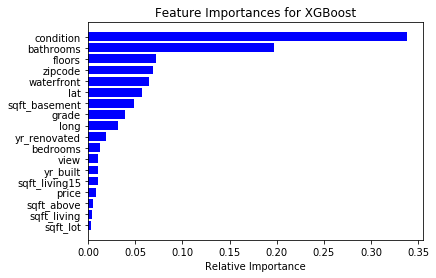

In [52]:
features = data.columns.values.tolist()
importances = xgbr.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances for XGBoost')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()